# Hospital Readmission Prediction - Exploratory Data Analysis

This notebook performs exploratory data analysis on the Diabetes 130-US Hospitals dataset to understand patterns related to patient readmissions.

## Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add the src directory to the path so we can import our modules
sys.path.append('..')
from src.data.acquisition import download_data, extract_data, create_directories

# Set up matplotlib
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Display all columns
pd.set_option('display.max_columns', None)

In [2]:
# Create directories and download data if needed
create_directories()
zip_path = download_data()
extract_data(zip_path)

# Load the data
DATA_DIR = Path("../data")
RAW_DATA_DIR = DATA_DIR / "raw"
data_path = RAW_DATA_DIR / "dataset_diabetes/diabetic_data.csv"

df = pd.read_csv(data_path)
print(f"Dataset loaded with shape: {df.shape}")

2025-03-08 15:44:39,170 - src.data.acquisition - INFO - Created directory: data
2025-03-08 15:44:39,173 - src.data.acquisition - INFO - Created directory: data\raw
2025-03-08 15:44:39,176 - src.data.acquisition - INFO - Created directory: data\processed
2025-03-08 15:44:39,179 - src.data.acquisition - INFO - Downloading dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip
2025-03-08 15:44:45,305 - src.data.acquisition - INFO - Dataset downloaded to data\raw\dataset_diabetes.zip
2025-03-08 15:44:45,481 - src.data.acquisition - INFO - Dataset extracted to data\raw


Dataset loaded with shape: (101766, 50)


## 1. Dataset Overview

In [3]:
# Display basic information about the dataset
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  i

In [4]:
# Look at the first few rows
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
# Check for missing values (represented as '?')
missing_values = df.replace('?', np.nan).isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("\nMissing values per column:")
missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)


Missing values per column:


,Missing Values,Percentage
weight,98569,96.858479
max_glu_serum,96420,94.746772
A1Cresult,84748,83.277322
medical_specialty,49949,49.082208
payer_code,40256,39.557416
race,2273,2.233555
diag_3,1423,1.398306
diag_2,358,0.351787
diag_1,21,0.020636


## 2. Target Variable Analysis

Let's explore the `readmitted` variable, which is our target for prediction.


Readmission distribution:
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Readmission rate (<30 days): 11.16%
Readmission rate (>30 days): 34.93%
No readmission rate: 53.91%


C:\Users\akash\AppData\Local\Temp\ipykernel_11916\850021273.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='readmitted', data=df, palette='viridis')


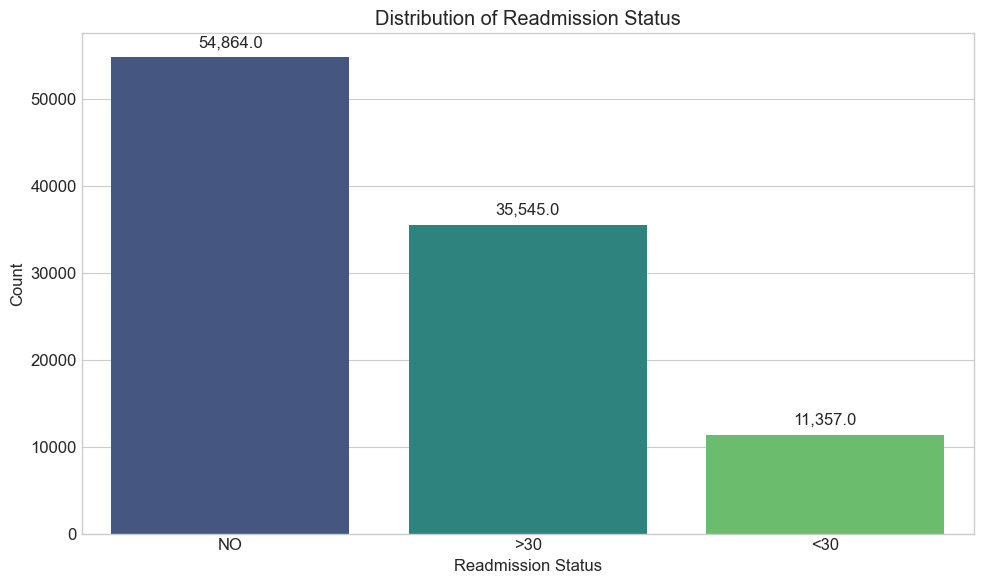

In [6]:
# Distribution of readmissions
readmission_counts = df['readmitted'].value_counts()
print("\nReadmission distribution:")
print(readmission_counts)
print(f"\nReadmission rate (<30 days): {readmission_counts['<30']/len(df):.2%}")
print(f"Readmission rate (>30 days): {readmission_counts['>30']/len(df):.2%}")
print(f"No readmission rate: {readmission_counts['NO']/len(df):.2%}")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='readmitted', data=df, palette='viridis')
plt.title('Distribution of Readmission Status')
plt.xlabel('Readmission Status')
plt.ylabel('Count')

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

## 3. Demographic Analysis

In [7]:
# Distribution of gender
gender_counts = df['gender'].value_counts()
print("\nGender distribution:")
print(gender_counts)

# Distribution of age
age_counts = df['age'].value_counts().sort_index()
print("\nAge distribution:")
print(age_counts)

# Distribution of race
race_counts = df['race'].value_counts()
print("\nRace distribution:")
print(race_counts)


Gender distribution:
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

Age distribution:
age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
Name: count, dtype: int64

Race distribution:
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


In [8]:
# Create a function to plot the relationship between a variable and readmission
def plot_readmission_by_category(df, column, title, figsize=(12, 6)):
    # Calculate the readmission rate for each category
    readmission_rate = df.groupby(column)['readmitted'].apply(
        lambda x: (x == '<30').mean()
    ).reset_index()
    readmission_rate.columns = [column, 'readmission_rate_30d']
    
    # Sort by readmission rate
    readmission_rate = readmission_rate.sort_values('readmission_rate_30d', ascending=False)
    
    # Add count information
    category_counts = df[column].value_counts().reset_index()
    category_counts.columns = [column, 'count']
    
    # Merge readmission rate with counts
    plot_data = pd.merge(readmission_rate, category_counts, on=column)
    
    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Plot readmission rate
    sns.barplot(x=column, y='readmission_rate_30d', data=plot_data, ax=ax1, palette='coolwarm')
    ax1.set_title(f'30-Day Readmission Rate by {title}')
    ax1.set_ylabel('Readmission Rate')
    ax1.set_ylim(0, plot_data['readmission_rate_30d'].max() * 1.1)
    
    # Add percentage labels
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():.1%}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'bottom', 
                    xytext = (0, 5), 
                    textcoords = 'offset points')
    
    # Plot category counts
    sns.barplot(x=column, y='count', data=plot_data, ax=ax2, palette='viridis')
    ax2.set_title(f'Distribution of {title}')
    ax2.set_ylabel('Count')
    
    # Add count labels
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height()):,}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'bottom', 
                    xytext = (0, 5), 
                    textcoords = 'offset points')
    
    plt.tight_layout()
    plt.show()
    
    return plot_data

C:\Users\akash\AppData\Local\Temp\ipykernel_11916\2440698952.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='readmission_rate_30d', data=plot_data, ax=ax1, palette='coolwarm')
C:\Users\akash\AppData\Local\Temp\ipykernel_11916\2440698952.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='count', data=plot_data, ax=ax2, palette='viridis')


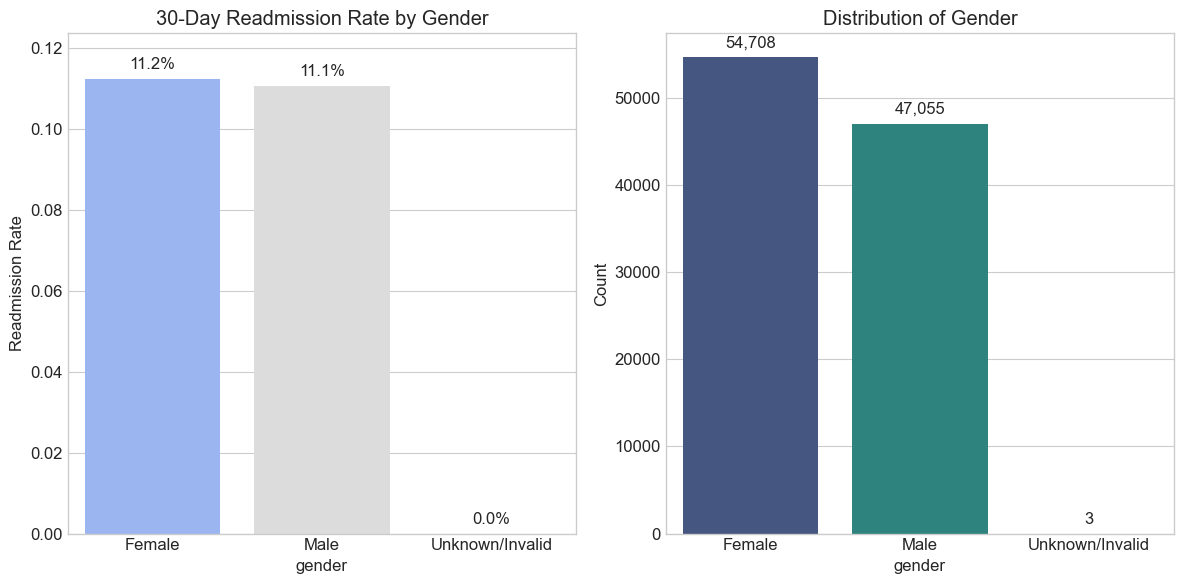

C:\Users\akash\AppData\Local\Temp\ipykernel_11916\2440698952.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='readmission_rate_30d', data=plot_data, ax=ax1, palette='coolwarm')
C:\Users\akash\AppData\Local\Temp\ipykernel_11916\2440698952.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='count', data=plot_data, ax=ax2, palette='viridis')


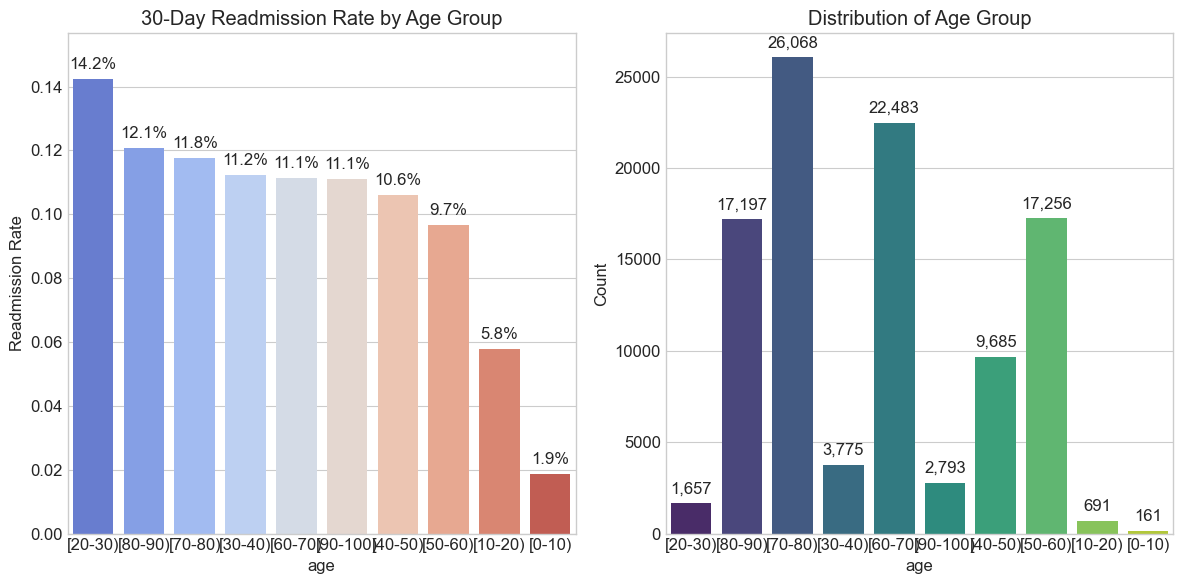

C:\Users\akash\AppData\Local\Temp\ipykernel_11916\2440698952.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='readmission_rate_30d', data=plot_data, ax=ax1, palette='coolwarm')
C:\Users\akash\AppData\Local\Temp\ipykernel_11916\2440698952.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='count', data=plot_data, ax=ax2, palette='viridis')


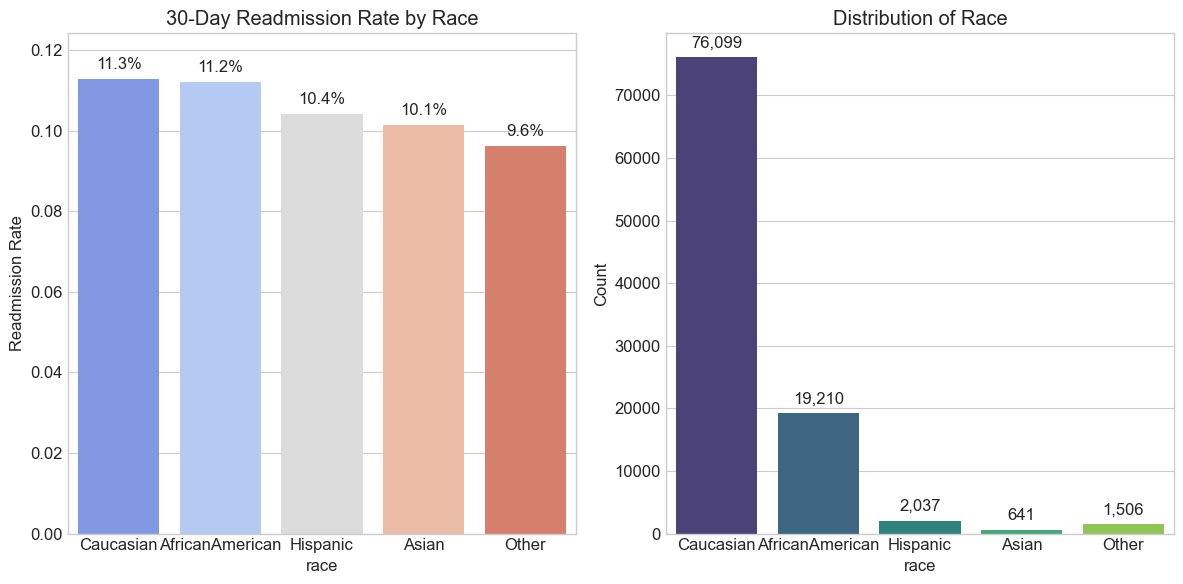

In [9]:
# Replace '?' with np.nan for analysis
df_clean = df.replace('?', np.nan)

# Plot readmission by gender
gender_readmission = plot_readmission_by_category(df_clean, 'gender', 'Gender')

# Plot readmission by age
age_readmission = plot_readmission_by_category(df_clean, 'age', 'Age Group')

# Plot readmission by race
race_readmission = plot_readmission_by_category(df_clean, 'race', 'Race')

## 4. Hospital Stay and Encounter Characteristics

2025-03-08 15:50:37,638 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\akash\AppData\Local\Temp\ipykernel_11916\306549955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='time_in_hospital', data=df_clean, palette='Blues_d')
2025-03-08 15:50:37,725 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


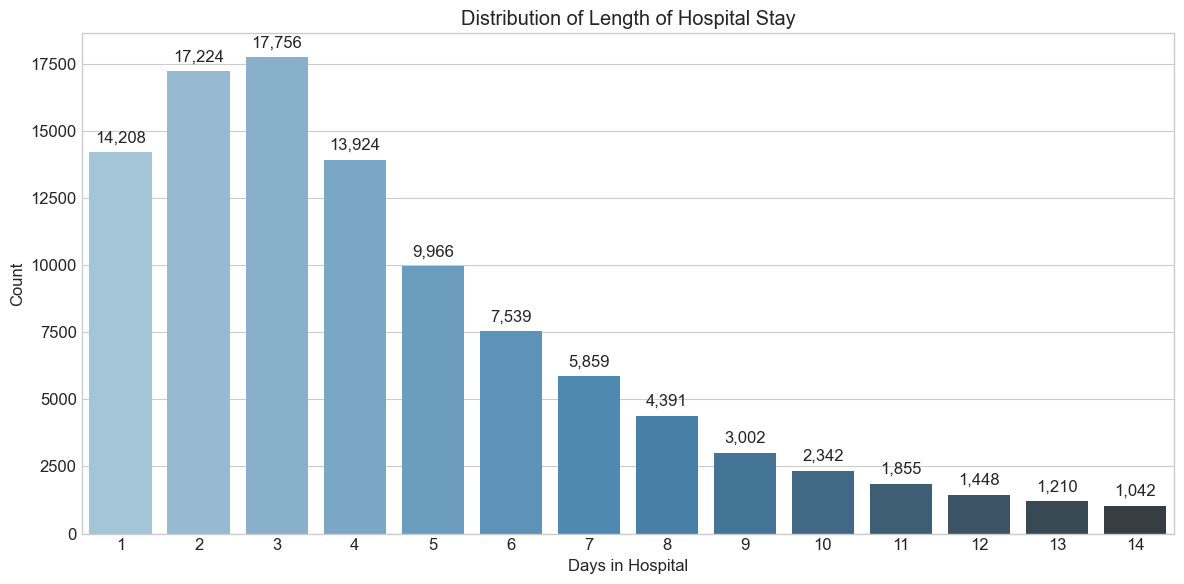

In [10]:
# Distribution of time_in_hospital
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='time_in_hospital', data=df_clean, palette='Blues_d')
plt.title('Distribution of Length of Hospital Stay')
plt.xlabel('Days in Hospital')
plt.ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

2025-03-08 15:50:43,281 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\akash\AppData\Local\Temp\ipykernel_11916\2440698952.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='readmission_rate_30d', data=plot_data, ax=ax1, palette='coolwarm')
2025-03-08 15:50:43,292 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-08 15:50:43,615 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings s

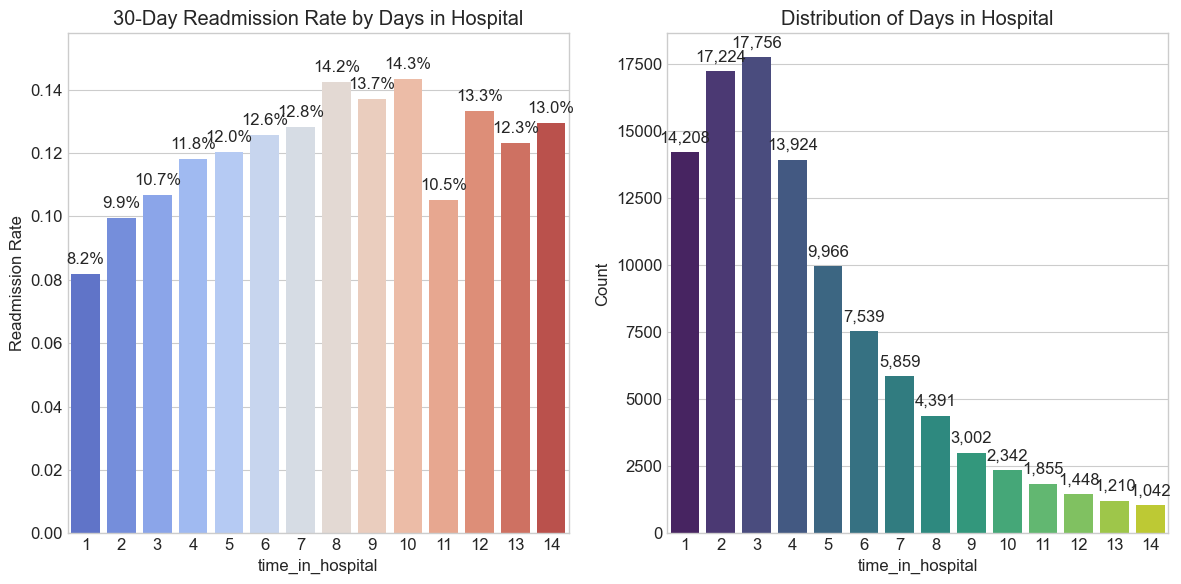

2025-03-08 15:50:44,335 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\akash\AppData\Local\Temp\ipykernel_11916\2440698952.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='readmission_rate_30d', data=plot_data, ax=ax1, palette='coolwarm')
2025-03-08 15:50:44,347 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-08 15:50:44,478 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings s

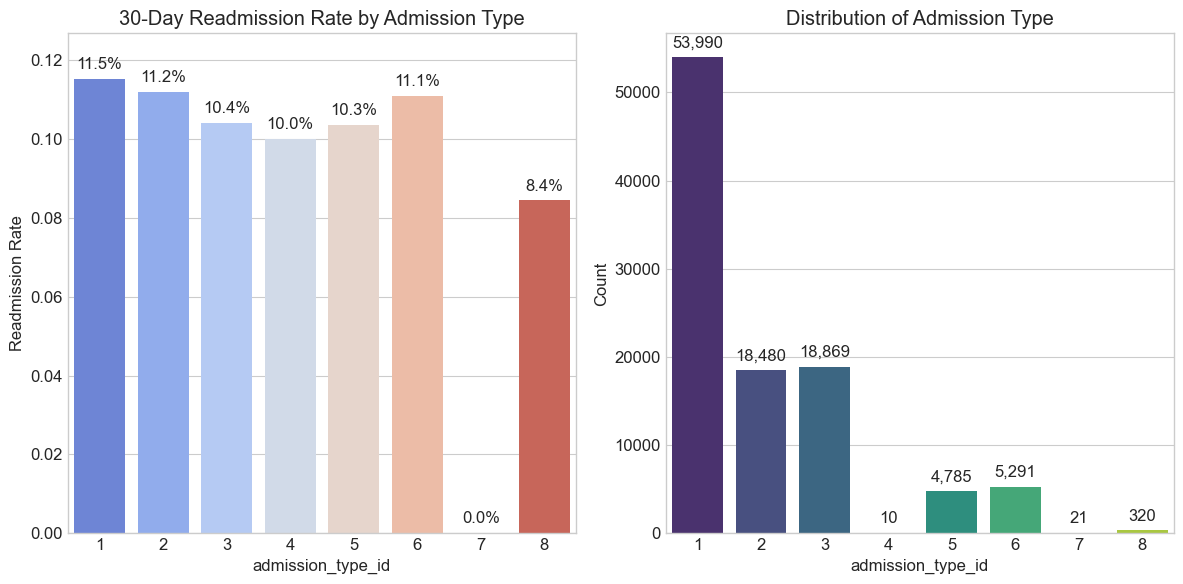

2025-03-08 15:50:45,104 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\akash\AppData\Local\Temp\ipykernel_11916\2440698952.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='readmission_rate_30d', data=plot_data, ax=ax1, palette='coolwarm')
2025-03-08 15:50:45,123 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-08 15:50:45,542 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings s

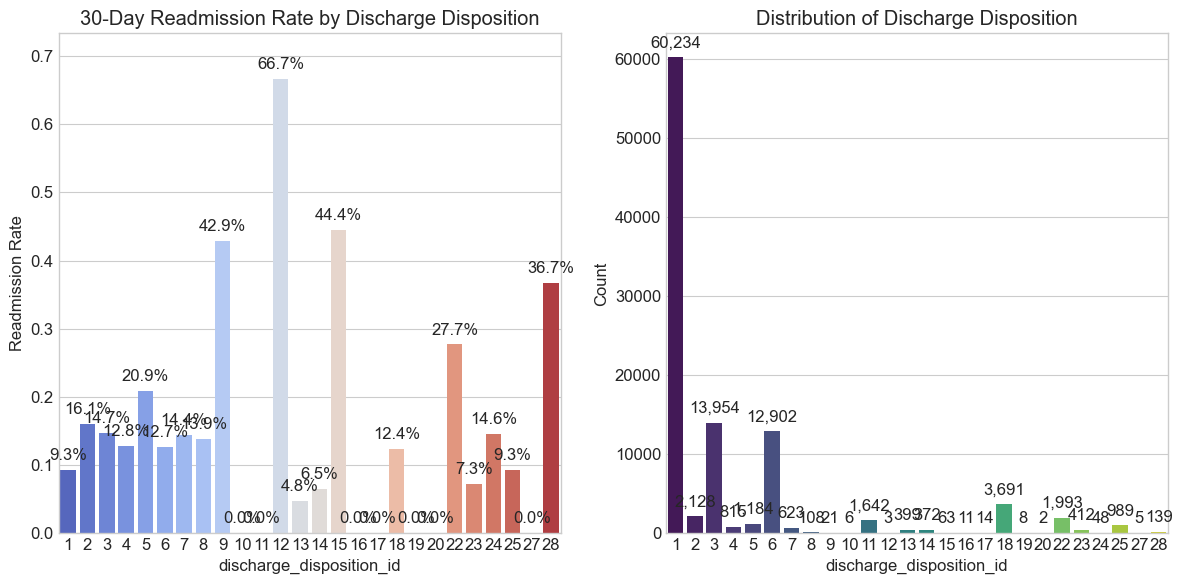

2025-03-08 15:50:46,604 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\akash\AppData\Local\Temp\ipykernel_11916\2440698952.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='readmission_rate_30d', data=plot_data, ax=ax1, palette='coolwarm')
2025-03-08 15:50:46,612 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-08 15:50:46,793 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings s

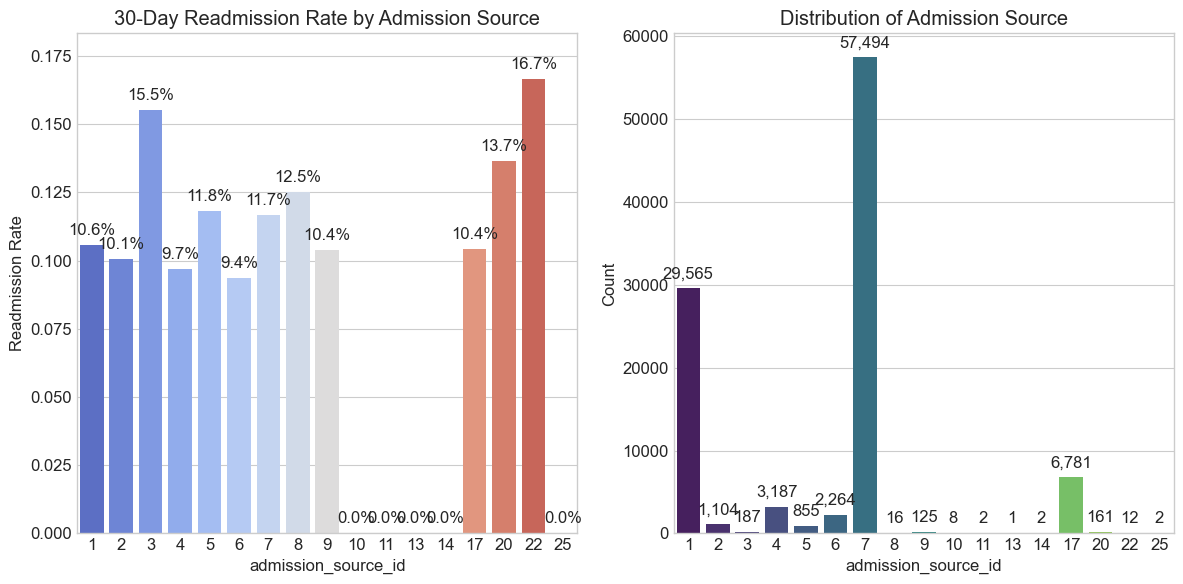

In [11]:
# Plot readmission rate by time_in_hospital
hospital_time_readmission = plot_readmission_by_category(df_clean, 'time_in_hospital', 'Days in Hospital')

# Plot readmission by admission_type_id
admission_type_readmission = plot_readmission_by_category(df_clean, 'admission_type_id', 'Admission Type')

# Plot readmission by discharge_disposition_id
discharge_readmission = plot_readmission_by_category(df_clean, 'discharge_disposition_id', 'Discharge Disposition')

# Plot readmission by admission_source_id
source_readmission = plot_readmission_by_category(df_clean, 'admission_source_id', 'Admission Source')

## 5. Medical and Procedure Characteristics

In [12]:
# Convert numeric columns to numeric type
numeric_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]

for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Calculate correlation with readmission within 30 days
df_clean['readmitted_30d'] = (df_clean['readmitted'] == '<30').astype(int)

# Correlation between numeric variables and readmission
correlations = df_clean[numeric_cols + ['readmitted_30d']].corr()['readmitted_30d'].sort_values(ascending=False)
print("\nCorrelation with 30-day readmission:")
print(correlations)


Correlation with 30-day readmission:
readmitted_30d        1.000000
number_inpatient      0.165147
number_emergency      0.060747
number_diagnoses      0.049524
time_in_hospital      0.044199
num_medications       0.038432
num_lab_procedures    0.020364
number_outpatient     0.018893
num_procedures       -0.012227
Name: readmitted_30d, dtype: float64


C:\Users\akash\AppData\Local\Temp\ipykernel_11916\3621958813.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')


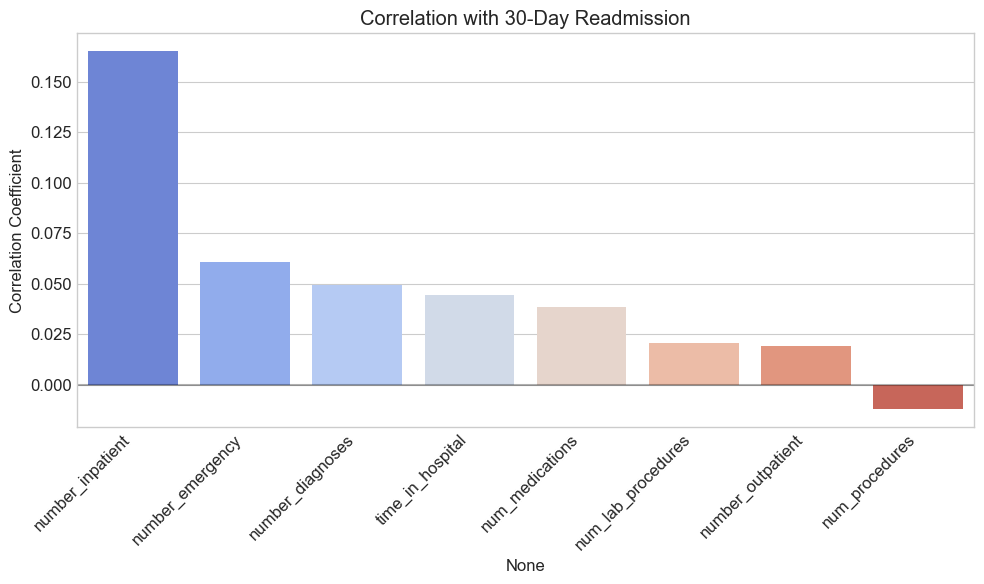

In [13]:
# Plot numeric variables against readmission
plt.figure(figsize=(10, 6))
correlations = correlations.drop('readmitted_30d')
sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')
plt.title('Correlation with 30-Day Readmission')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlation Coefficient')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_11916\3718698251.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmitted', y=col, data=df_clean, ax=axes[i], palette='Set2')
C:\Users\akash\AppData\Local\Temp\ipykernel_11916\3718698251.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmitted', y=col, data=df_clean, ax=axes[i], palette='Set2')
C:\Users\akash\AppData\Local\Temp\ipykernel_11916\3718698251.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmitted', y=col, data=df_clean, ax=axes[i], palette='Set2')
C:\Users\a

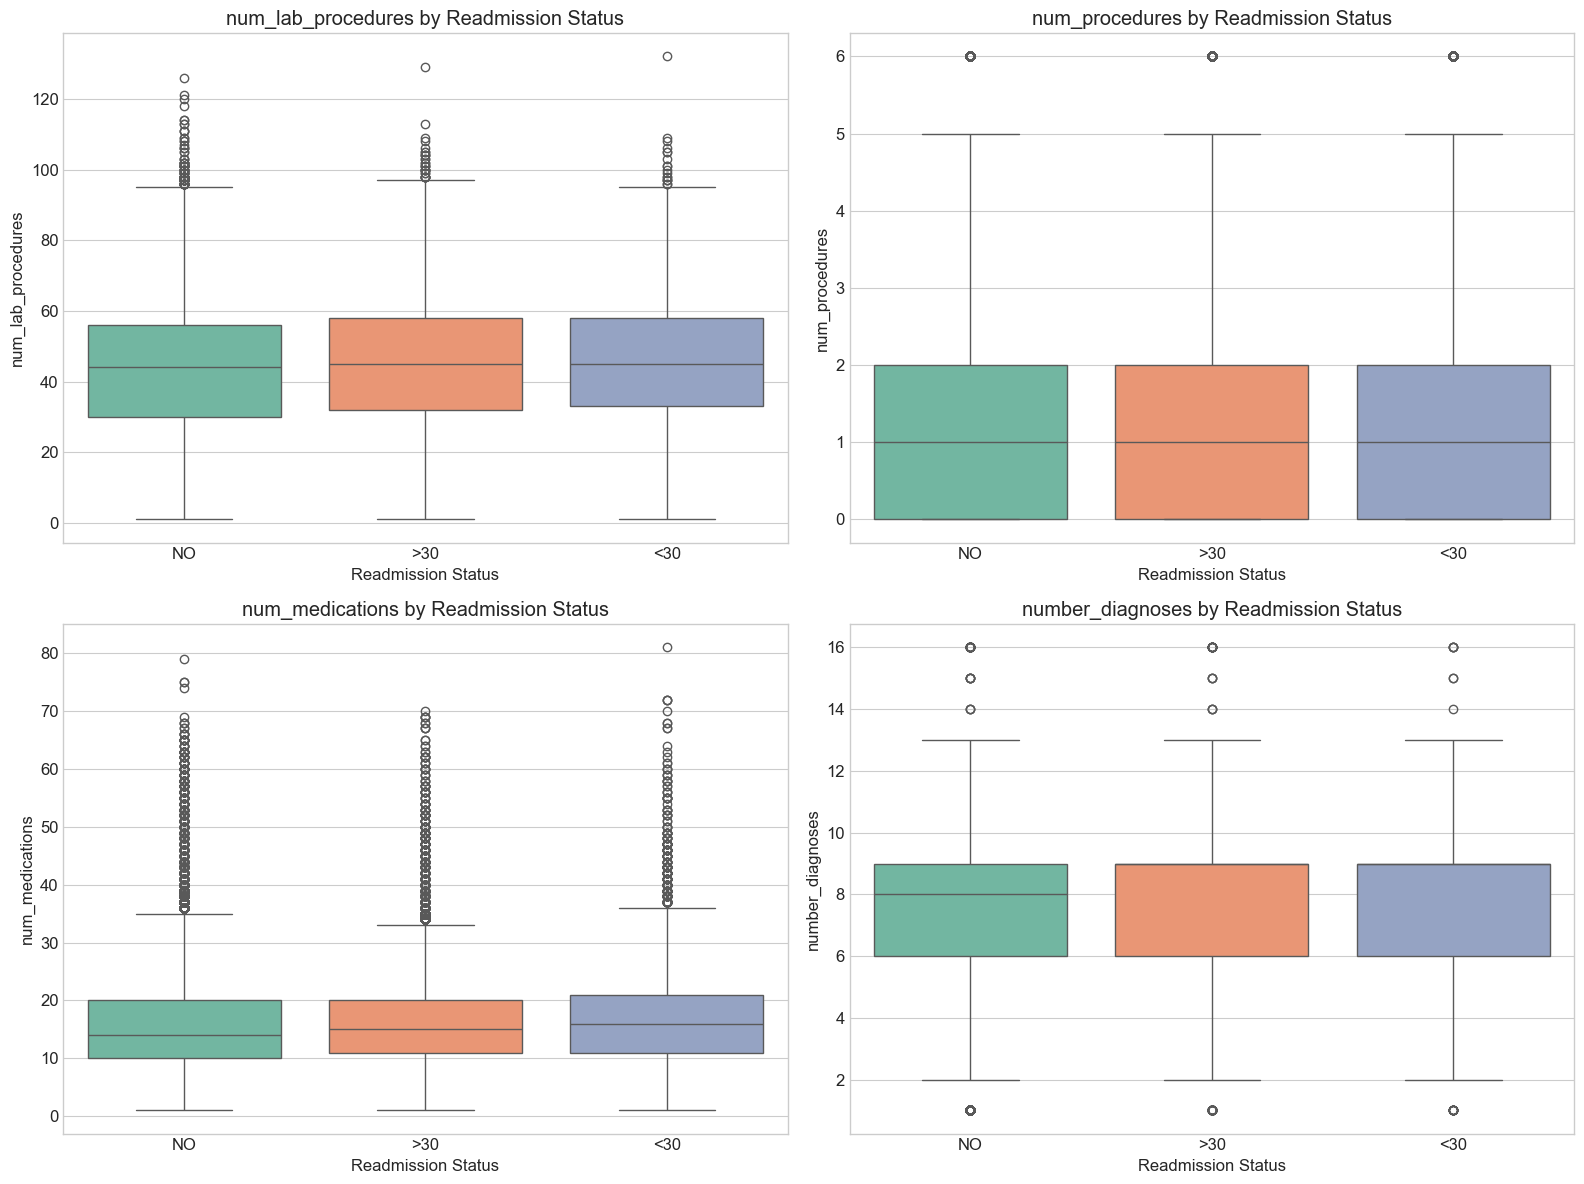

In [14]:
# Create boxplots to compare distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(['num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses']):
    sns.boxplot(x='readmitted', y=col, data=df_clean, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} by Readmission Status')
    axes[i].set_xlabel('Readmission Status')
    
plt.tight_layout()
plt.show()

## 6. Diagnosis Analysis

In [15]:
# Define a function to categorize diagnosis codes
def categorize_diagnosis(code):
    try:
        if pd.isna(code) or code == '?':
            return 'Unknown'
            
        # Convert to string and clean
        code_str = str(code).strip()
        
        # Check if it's the ICD-9 code format with V or E prefix
        if code_str.startswith('V'):
            return 'V_codes'  # Supplementary classification
        elif code_str.startswith('E'):
            return 'E_codes'  # External causes
            
        # Try to convert to numeric for range checking
        code_num = float(code_str)
        
        # Categorize based on ICD-9 chapter ranges
        if 1 <= code_num < 140:
            return 'Infectious'
        elif 140 <= code_num < 240:
            return 'Neoplasms'
        elif 240 <= code_num < 280:
            return 'Endocrine'  # Includes diabetes
        elif 280 <= code_num < 290:
            return 'Blood'
        elif 290 <= code_num < 320:
            return 'Mental'
        elif 320 <= code_num < 390:
            return 'Nervous'
        elif 390 <= code_num < 460:
            return 'Circulatory'  # Heart disease, hypertension
        elif 460 <= code_num < 520:
            return 'Respiratory'
        elif 520 <= code_num < 580:
            return 'Digestive'
        elif 580 <= code_num < 630:
            return 'Genitourinary'
        elif 630 <= code_num < 680:
            return 'Pregnancy'
        elif 680 <= code_num < 710:
            return 'Skin'
        elif 710 <= code_num < 740:
            return 'Musculoskeletal'
        elif 740 <= code_num < 760:
            return 'Congenital'
        elif 760 <= code_num < 780:
            return 'Perinatal'
        elif 780 <= code_num < 800:
            return 'Symptoms'
        elif 800 <= code_num < 1000:
            return 'Injury'
        else:
            return 'Other'
    except:
        return 'Unknown'

# Apply the categorization to diagnosis columns
df_clean['diag_1_category'] = df_clean['diag_1'].apply(categorize_diagnosis)
df_clean['diag_2_category'] = df_clean['diag_2'].apply(categorize_diagnosis)
df_clean['diag_3_category'] = df_clean['diag_3'].apply(categorize_diagnosis)

# Analyze primary diagnosis categories
diag_1_counts = df_clean['diag_1_category'].value_counts()
print("\nPrimary diagnosis categories:")
print(diag_1_counts)


Primary diagnosis categories:
diag_1_category
Circulatory        30336
Endocrine          11459
Respiratory        10407
Digestive           9208
Symptoms            7636
Injury              6974
Genitourinary       5078
Musculoskeletal     4957
Neoplasms           3433
Infectious          2768
Skin                2530
Mental              2262
V_codes             1644
Nervous             1211
Blood               1103
Pregnancy            687
Congenital            51
Unknown               21
E_codes                1
Name: count, dtype: int64


C:\Users\akash\AppData\Local\Temp\ipykernel_11916\2440698952.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='readmission_rate_30d', data=plot_data, ax=ax1, palette='coolwarm')
C:\Users\akash\AppData\Local\Temp\ipykernel_11916\2440698952.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='count', data=plot_data, ax=ax2, palette='viridis')


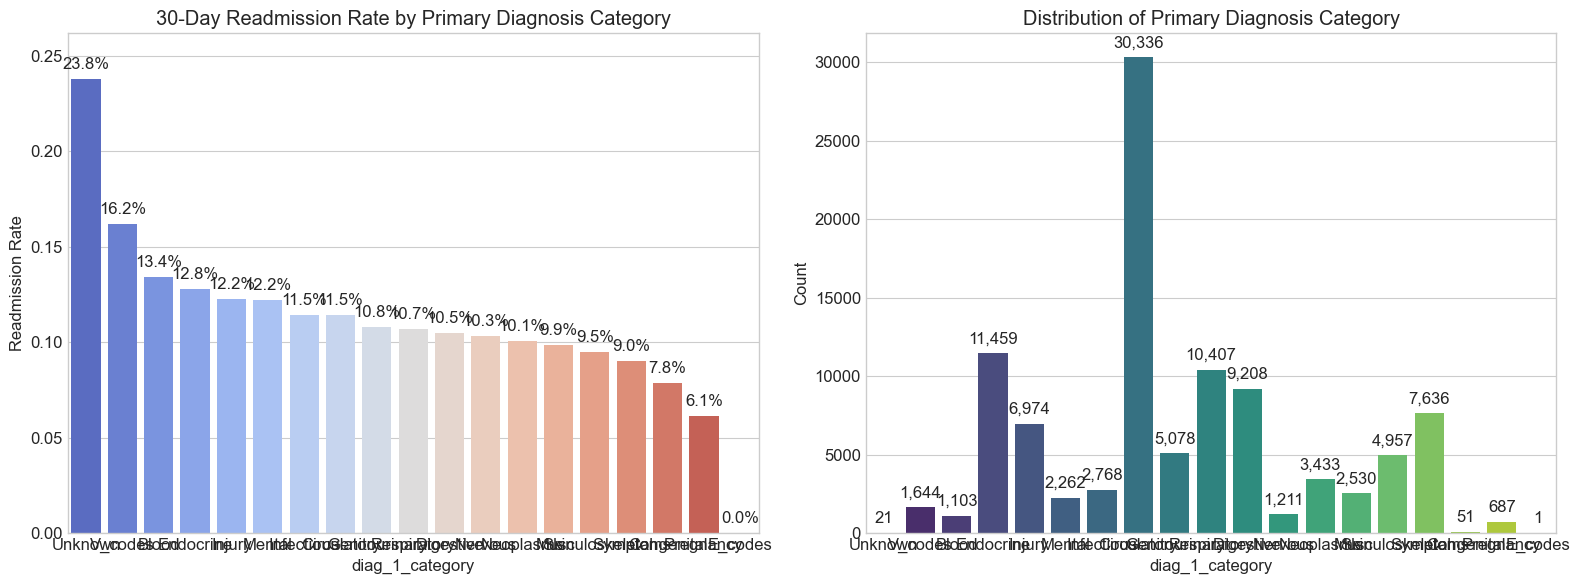

In [16]:
# Plot readmission by primary diagnosis category
diag_readmission = plot_readmission_by_category(df_clean, 'diag_1_category', 'Primary Diagnosis Category', figsize=(16, 6))

## 7. Medication Analysis

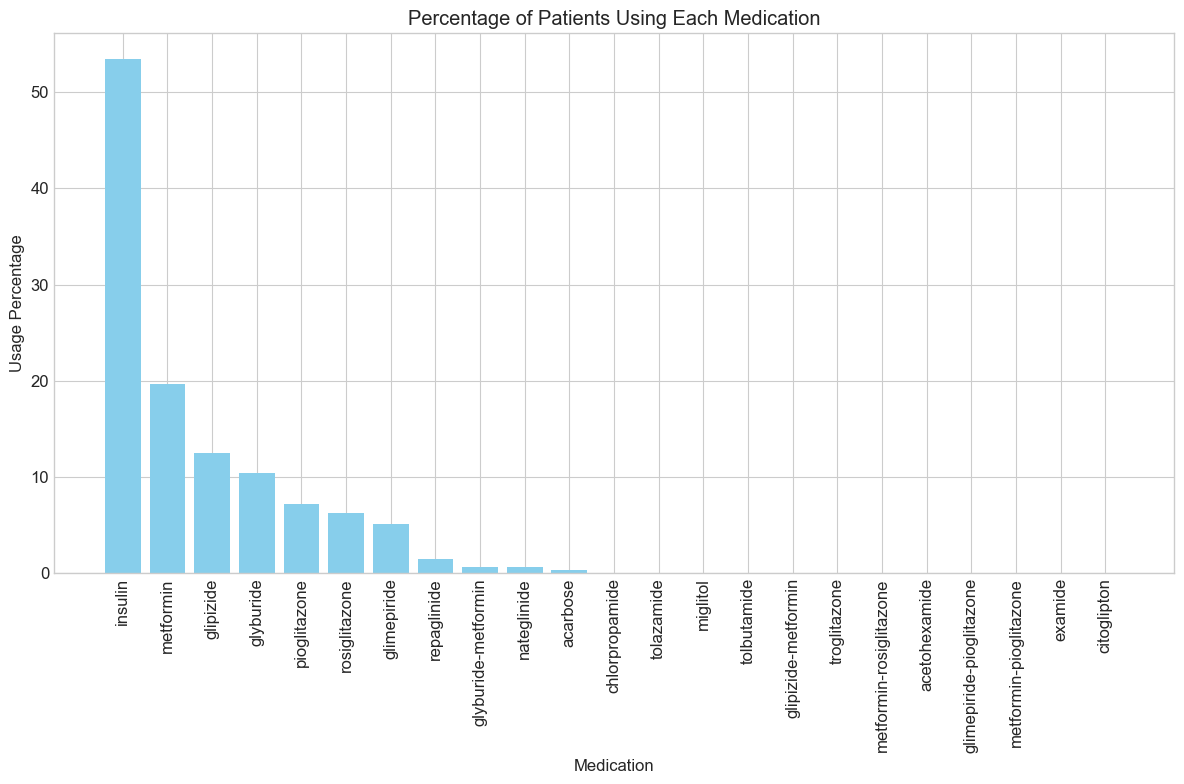

In [17]:
# Analyze medication columns
medication_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'troglitazone', 'tolazamide', 'examide',
    'citoglipton', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone'
]

# Calculate medication usage percentages
med_usage = {}
for col in medication_cols:
    usage_counts = df_clean[col].value_counts()
    usage_percentage = usage_counts.get('Steady', 0) + usage_counts.get('Up', 0) + usage_counts.get('Down', 0)
    med_usage[col] = usage_percentage / len(df_clean) * 100

# Sort by usage percentage
med_usage = dict(sorted(med_usage.items(), key=lambda item: item[1], reverse=True))

# Plot medication usage
plt.figure(figsize=(12, 8))
plt.bar(med_usage.keys(), med_usage.values(), color='skyblue')
plt.title('Percentage of Patients Using Each Medication')
plt.xlabel('Medication')
plt.ylabel('Usage Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_11916\3129742834.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=med_correlations.index, y=med_correlations.values, palette='coolwarm')


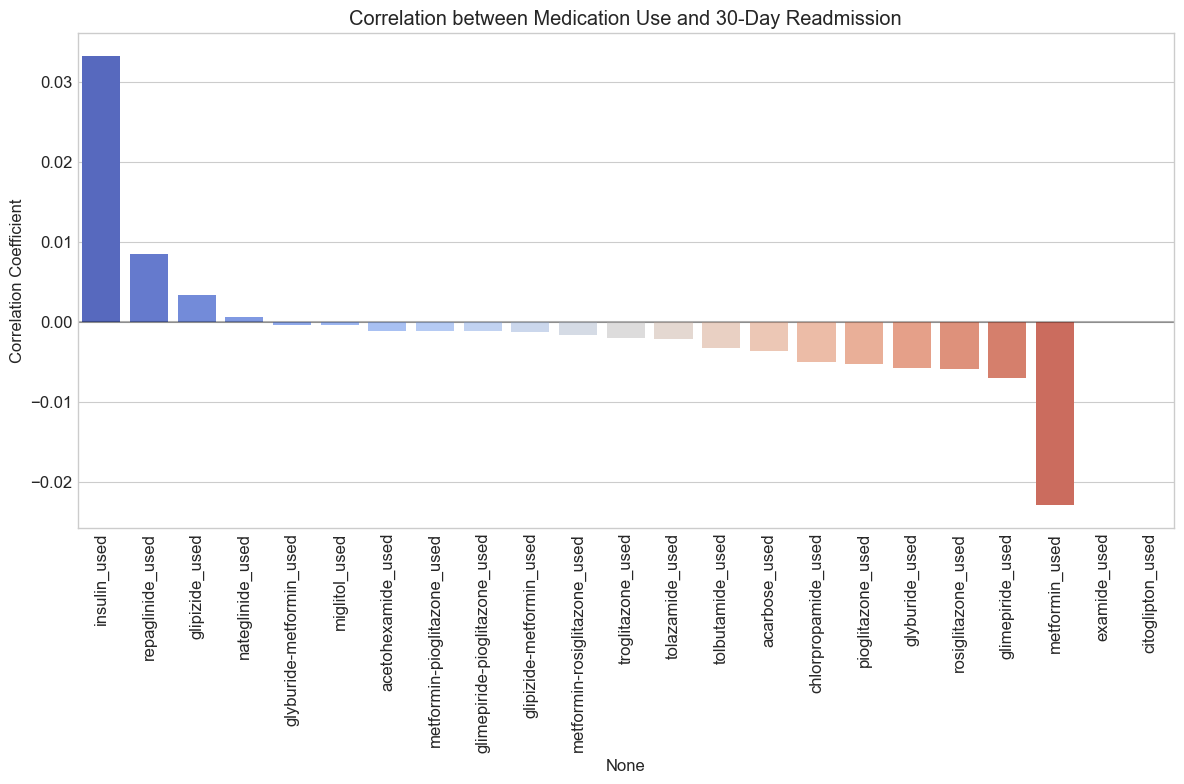

In [18]:
# Create a binary indicator for medication use
for col in medication_cols:
    df_clean[f'{col}_used'] = df_clean[col].apply(lambda x: 0 if x == 'No' else 1)

# Calculate correlation between medication use and readmission
med_cols_binary = [f'{col}_used' for col in medication_cols]
med_correlations = df_clean[med_cols_binary + ['readmitted_30d']].corr()['readmitted_30d'].drop('readmitted_30d').sort_values(ascending=False)

# Plot correlation between medication use and readmission
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=med_correlations.index, y=med_correlations.values, palette='coolwarm')
plt.title('Correlation between Medication Use and 30-Day Readmission')
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficient')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_11916\2440698952.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='readmission_rate_30d', data=plot_data, ax=ax1, palette='coolwarm')
C:\Users\akash\AppData\Local\Temp\ipykernel_11916\2440698952.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='count', data=plot_data, ax=ax2, palette='viridis')


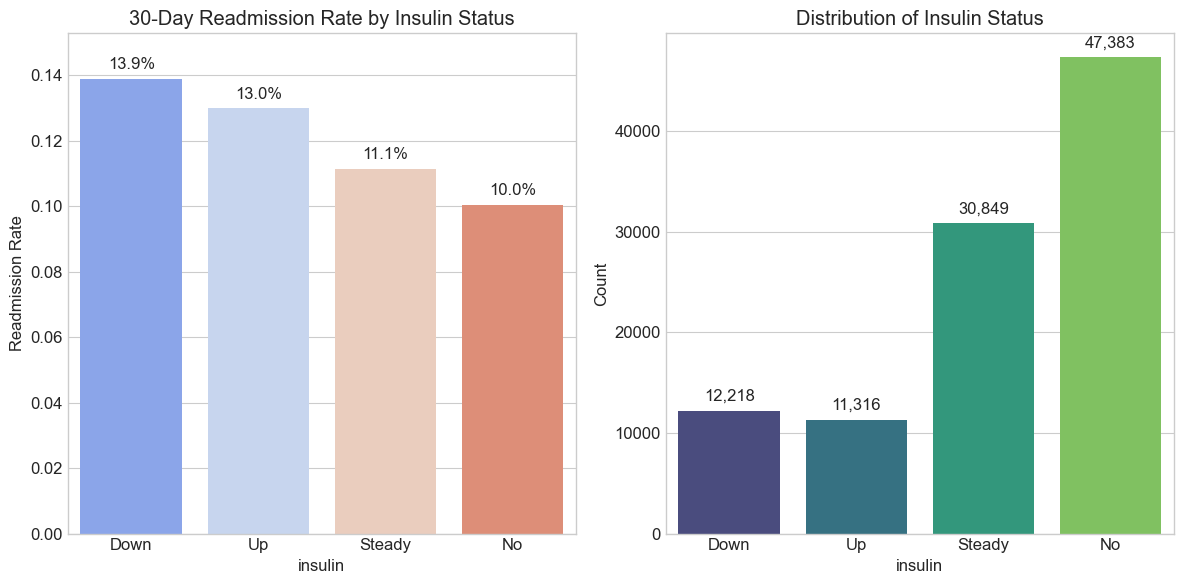

In [19]:
# Insulin analysis
insulin_readmission = plot_readmission_by_category(df_clean, 'insulin', 'Insulin Status')

## 8. Lab Results Analysis

C:\Users\akash\AppData\Local\Temp\ipykernel_11916\2440698952.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='readmission_rate_30d', data=plot_data, ax=ax1, palette='coolwarm')
C:\Users\akash\AppData\Local\Temp\ipykernel_11916\2440698952.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='count', data=plot_data, ax=ax2, palette='viridis')


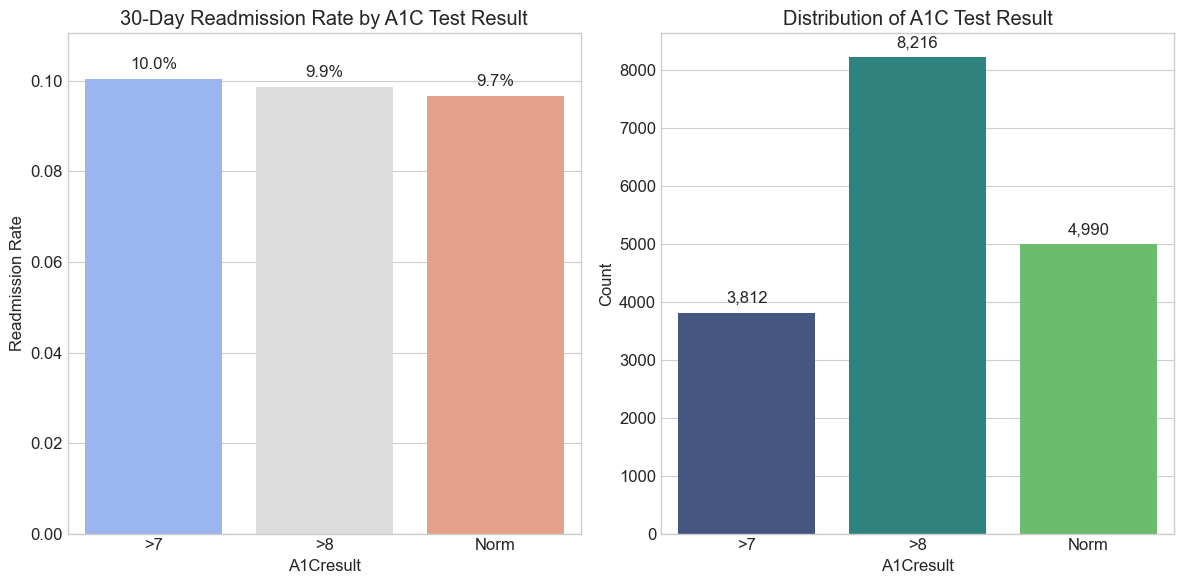

C:\Users\akash\AppData\Local\Temp\ipykernel_11916\2440698952.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='readmission_rate_30d', data=plot_data, ax=ax1, palette='coolwarm')
C:\Users\akash\AppData\Local\Temp\ipykernel_11916\2440698952.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='count', data=plot_data, ax=ax2, palette='viridis')


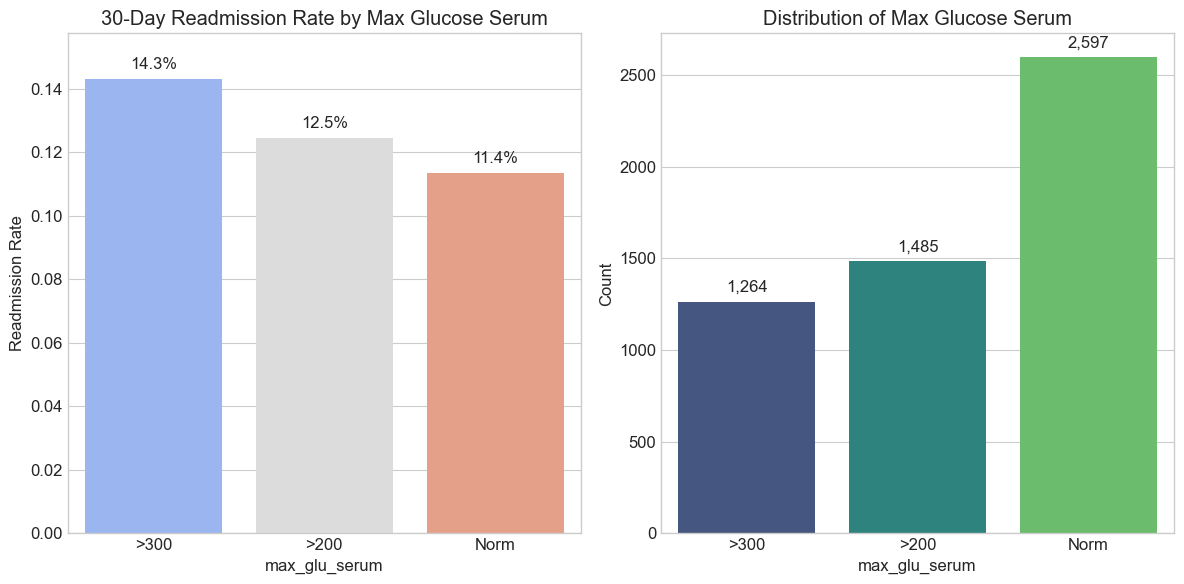

In [20]:
# Analyze A1C results
a1c_readmission = plot_readmission_by_category(df_clean, 'A1Cresult', 'A1C Test Result')

# Analyze glucose results
glu_readmission = plot_readmission_by_category(df_clean, 'max_glu_serum', 'Max Glucose Serum')

## 9. Summary of Key Findings

In [21]:
# Top factors associated with readmission
print("\nTop numeric factors correlated with 30-day readmission:")
print(correlations.head())

print("\nTop medications correlated with 30-day readmission:")
print(med_correlations.head())

print("\nAge groups with highest readmission rates:")
print(age_readmission.head(3))

print("\nDiagnosis categories with highest readmission rates:")
print(diag_readmission.head(3))


Top numeric factors correlated with 30-day readmission:
number_inpatient    0.165147
number_emergency    0.060747
number_diagnoses    0.049524
time_in_hospital    0.044199
num_medications     0.038432
Name: readmitted_30d, dtype: float64

Top medications correlated with 30-day readmission:
insulin_used                0.033278
repaglinide_used            0.008502
glipizide_used              0.003425
nateglinide_used            0.000582
glyburide-metformin_used   -0.000297
Name: readmitted_30d, dtype: float64

Age groups with highest readmission rates:
       age  readmission_rate_30d  count
0  [20-30)              0.142426   1657
1  [80-90)              0.120835  17197
2  [70-80)              0.117731  26068

Diagnosis categories with highest readmission rates:
  diag_1_category  readmission_rate_30d  count
0         Unknown              0.238095     21
1         V_codes              0.161800   1644
2           Blood              0.134180   1103


## 10. Feature Engineering Ideas

Based on the exploratory analysis, here are some feature engineering ideas for the predictive model:

1. **Age-related features**:
   - Convert categorical age to numeric
   - Create age groups (young, middle-aged, senior, elderly)

2. **Diagnosis-related features**:
   - Categorize diagnoses into clinical groups
   - Create indicators for diabetes, circulatory, and respiratory diagnoses
   - Create comorbidity indicators (multiple condition types)

3. **Medication-related features**:
   - Create binary indicators for medication use
   - Calculate total number of medications
   - Medication diversity ratio
   - Insulin with high A1C risk feature

4. **Hospital utilization features**:
   - Total number of visits
   - Length of stay categories
   
5. **Lab and procedure intensity**:
   - Categorize lab procedure counts
   - Categorize diagnostic procedure counts

## Save Processed Data for Next Steps

In [22]:
# Save the processed dataframe for further analysis
PROCESSED_DATA_DIR = DATA_DIR / "processed"
PROCESSED_DATA_DIR.mkdir(parents=True, exist_ok=True)
df_clean.to_csv(PROCESSED_DATA_DIR / "diabetes_eda.csv", index=False)
print(f"Processed data saved to {PROCESSED_DATA_DIR / 'diabetes_eda.csv'}")

Processed data saved to ..\data\processed\diabetes_eda.csv
